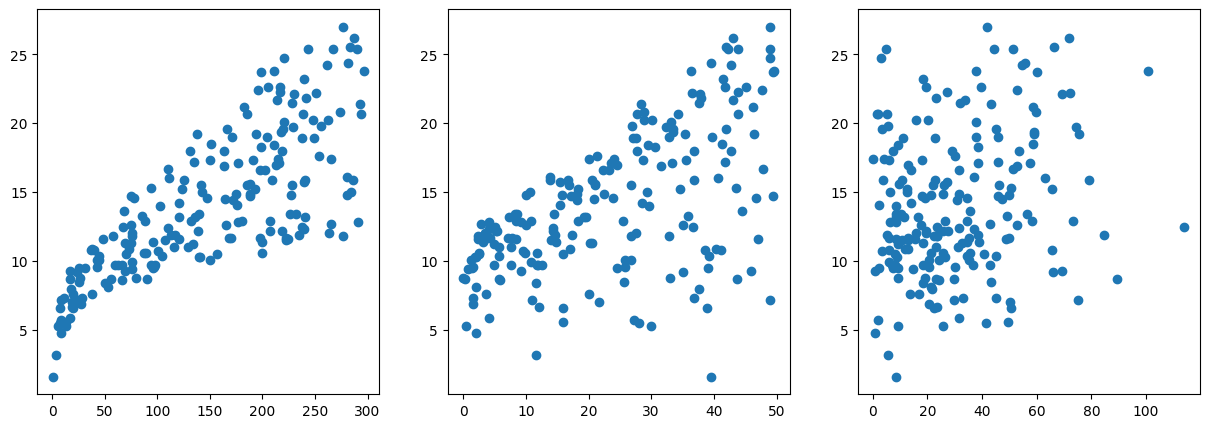

In [49]:
from statistics import LinearRegression

import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import isl_data
import importlib

from isl_data import Advertising

importlib.reload(isl_data)

advertising = pd.read_csv(isl_data.Advertising)
advertising_desc = advertising.describe()

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(advertising['TV'], advertising['sales'])
ax[1].scatter(advertising['radio'], advertising['sales'])
ax[2].scatter(advertising['newspaper'], advertising['sales'])
fig;

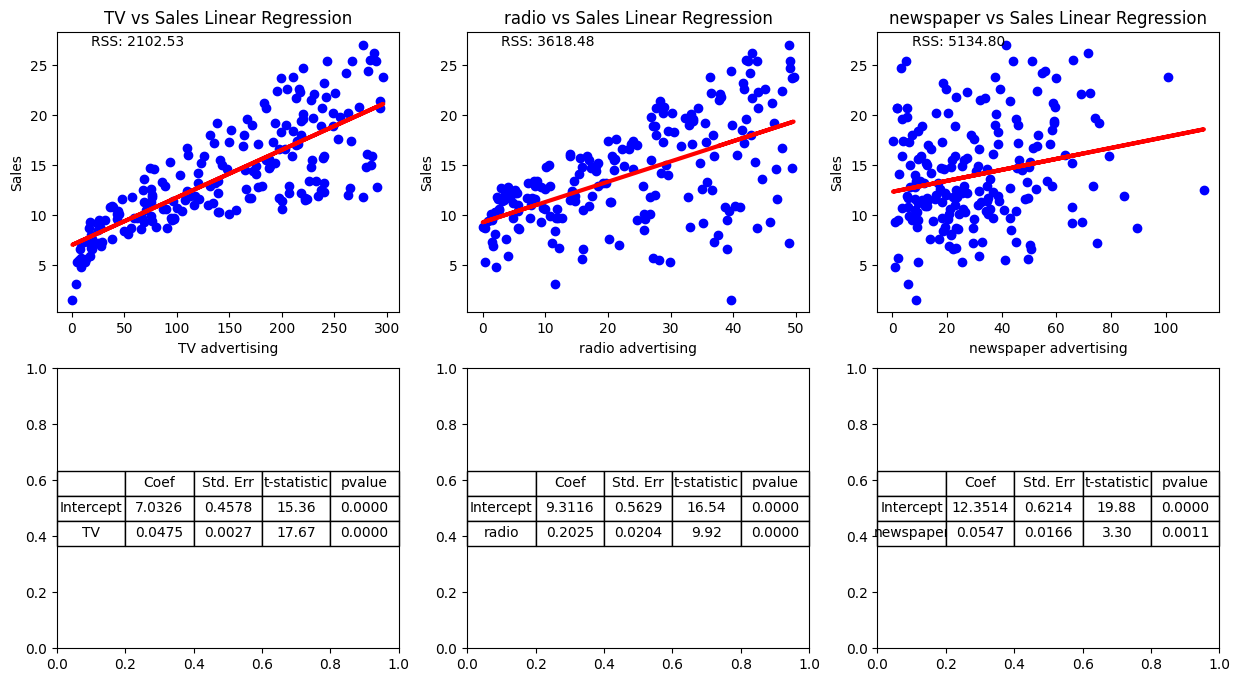

In [50]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
for idx, medium in enumerate(['TV', 'radio', 'newspaper']):
    X = advertising[medium]
    Y = advertising['sales']

    X = np.vstack([np.ones(len(X)), X]).T
    theta = np.linalg.inv(X.T @ X) @ X.T @ Y

    y_pred = X @ theta

    # Plot the results
    ax[0, idx].scatter(advertising[medium], advertising['sales'], color='blue')
    ax[0, idx].plot(advertising[medium], y_pred, color='red', linewidth=3)
    ax[0, idx].set_xlabel(f'{medium} advertising')
    ax[0, idx].set_ylabel('Sales')
    ax[0, idx].set_title(f'{medium} vs Sales Linear Regression')

    # Calculate the RSS
    residuals = Y - y_pred
    rss = np.sum(residuals ** 2)
    ax[0, idx].text(0.1, 0.95, f'RSS: {rss:.2f}', transform=ax[0, idx].transAxes)

    # Calculate the p-value
    # Degrees of freedom
    df = len(Y) - X.shape[1]
    # Mean Squared Error
    mse = rss / df
    # Variance-Covariance Matrix
    var_cov_matrix = mse * np.linalg.inv(X.T @ X)
    # Standard errors of the coefficients
    se = np.sqrt(np.diag(var_cov_matrix))
    # t-statistics
    t_stats = theta / se
    # p-values
    p_values = [2 * (1 - stats.t.cdf(np.abs(t), df)) for t in t_stats]

    table_data = [
        ['Intercept', f'{theta[0]:.4f}', f'{se[0]:.4f}', f'{t_stats[0]:.2f}', f'{p_values[0]:.4f}'],
        [medium, f'{theta[1]:.4f}', f'{se[1]:.4f}', f'{t_stats[1]:.2f}', f'{p_values[1]:.4f}'],
    ]

    # Add table to plot
    table = ax[1, idx].table(cellText=table_data, colLabels=['', 'Coef', 'Std. Err', 't-statistic', 'pvalue'],
                             loc=(0, 0), cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)




In [80]:
# Prepare the predictors and response variable
X = advertising[['TV', 'radio', 'newspaper']]
y = advertising['sales']

# Add a column of ones for the intercept
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Compute the coefficients using the normal equation
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# Predictions
y_pred = X @ theta

# Residuals
residuals = y - y_pred

# Degrees of freedom
df = len(y) - X.shape[1]

# Mean Squared Error
mse = np.sum(residuals ** 2) / df

# Variance-Covariance Matrix
var_cov_matrix = mse * np.linalg.inv(X.T @ X)

# Standard errors of the coefficients
se = np.sqrt(np.diag(var_cov_matrix))

# t-statistics
t_stats = theta / se

# p-values
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df)) for t in t_stats]

# Print the results
print('Coefficients:', [f"{num:.4f}" for num in theta])
print('Standard Errors:', [f"{num:.4f}" for num in se])
print('t-statistics:', [f"{num:.4f}" for num in t_stats])
print('p-values:', [f"{num:.4f}" for num in p_values])

Coefficients: ['2.9389', '0.0458', '0.1885', '-0.0010']
Standard Errors: ['0.3119', '0.0014', '0.0086', '0.0059']
t-statistics: ['9.4223', '32.8086', '21.8935', '-0.1767']
p-values: ['0.0000', '0.0000', '0.0000', '0.8599']


In [52]:
# Total Sum of Squares (TSS)
tss = np.sum((y - np.mean(y)) ** 2)
# Residual Sum of Squares (RSS)
rss = np.sum(residuals ** 2)
# Regression Sum of Squares (RegSS)
regss = tss - rss
# Degrees of freedom
n = len(y)
p = X.shape[1] - 1
# Mean Squared Error
mse = rss / (n - p - 1)

# F-statistic
f_statistic = (regss / p) / mse
# R-squared
r_squared = 1 - (rss / tss)
# Residual Standard Error (RSE)
rse = np.sqrt(rss / df)

print('Residual Standard Error:', rse)
print('r-squared:', r_squared)
print('F-statistic:', f_statistic)

Residual Standard Error: 1.685510373414744
r-squared: 0.8972106381789522
F-statistic: 570.2707036590942


Coefficients: ['2.9211', '0.0458', '0.1880']
Standard Errors: ['0.2945', '0.0014', '0.0080']
t-statistics: ['9.9192', '32.9087', '23.3824']
p-values: ['0.0000', '0.0000', '0.0000']


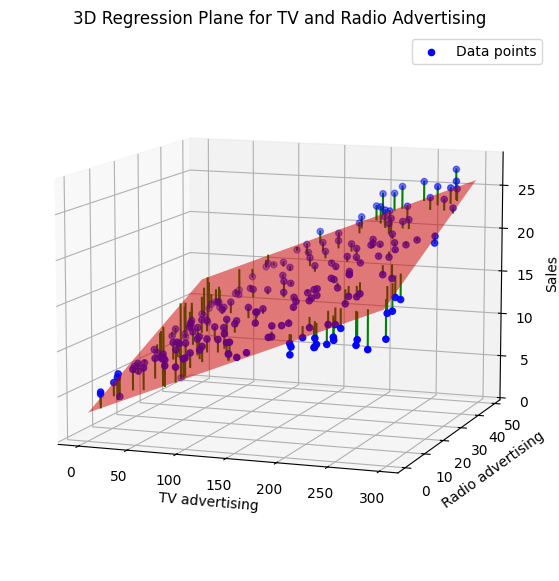

In [53]:
# TV and radio only

# Prepare the predictors and response variable
X = advertising[['TV', 'radio']]
y = advertising['sales']

# Add a column of ones for the intercept
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Compute the coefficients using the normal equation
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# Predictions
y_pred = X @ theta

# Residuals
residuals = y - y_pred

# Degrees of freedom
df = len(y) - X.shape[1]

# Mean Squared Error
mse = np.sum(residuals ** 2) / df

# Variance-Covariance Matrix
var_cov_matrix = mse * np.linalg.inv(X.T @ X)

# Standard errors of the coefficients
se = np.sqrt(np.diag(var_cov_matrix))

# t-statistics
t_stats = theta / se

# p-values
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df)) for t in t_stats]

# Print the results
print('Coefficients:', [f"{num:.4f}" for num in theta])
print('Standard Errors:', [f"{num:.4f}" for num in se])
print('t-statistics:', [f"{num:.4f}" for num in t_stats])
print('p-values:', [f"{num:.4f}" for num in p_values])

# Predictions
y_pred = X @ theta

# Create a meshgrid for the plane
tv_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
radio_range = np.linspace(X[:, 2].min(), X[:, 2].max(), 10)
tv_grid, radio_grid = np.meshgrid(tv_range, radio_range)
sales_plane = theta[0] + theta[1] * tv_grid + theta[2] * radio_grid

# Plot the data points and the regression plane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
ax.scatter(advertising['TV'], advertising['radio'], y, color='blue', label='Data points')

# Plot the regression plane
ax.plot_surface(tv_grid, radio_grid, sales_plane, color='red', alpha=0.5, rstride=100, cstride=100)


# Draw lines representing the residuals
for i in range(len(y)):
    ax.plot([advertising['TV'][i], advertising['TV'][i]],
            [advertising['radio'][i], advertising['radio'][i]],
            [y[i], y_pred[i]], color='green')
    
# Rotate the plot
ax.view_init(elev=10, azim=-70)  # Adjust the elevation and azimuthal angles as needed

# Labels and title
ax.set_xlabel('TV advertising')
ax.set_ylabel('Radio advertising')
ax.set_zlabel('Sales')
ax.set_title('3D Regression Plane for TV and Radio Advertising')

plt.legend()
plt.show()

In [54]:
#confidence interval
# 100,000 spent in TV, 20,000 spent in radio.
pred_y = (theta * [1, 100, 20]).sum() # prediction of sales
print(f'prediction: {pred_y*1000:.2f}')
print(f'degrees of freedom: {df}')
confidence_interval = stats.t.ppf(0.975, df) * rse * np.sqrt([1, 100, 20] @ np.linalg.inv(X.T @ X) @ [1, 100, 20])
lower = (pred_y - confidence_interval) * 1000
upper = (pred_y + confidence_interval) * 1000
print(f'confidence interval: {lower:.2f} - {upper:.2f}')

prediction: 11256.47
degrees of freedom: 197
confidence interval: 10984.59 - 11528.35


In [55]:
# Prediction interval
prediction_interval = stats.t.ppf(0.975, df) * rse * np.sqrt(1 + [1, 100, 20] @ np.linalg.inv(X.T @ X) @ [1, 100, 20])
lower = (pred_y - prediction_interval) * 1000
upper = (pred_y + prediction_interval) * 1000
# Why are this numbers off compared to the numbers in the book?
print(f'prediction interval: {lower:.2f} - {upper:.2f}')

prediction interval: 7921.41 - 14591.53


In [94]:
# Qualitative predictors
# add hot shot columns
Credit = pd.read_csv(isl_data.Credit)
# Create new matrix with region dummy variables
west_region = (Credit['Region'] == 'West').astype(int)
south_region = (Credit['Region'] == 'South').astype(int)
east_region = np.zeros(len(west_region))


intercept = np.ones(len(west_region))
X = np.vstack((intercept, east_region, south_region, west_region)).T
Y = Credit['Balance']
# Calculate the linear regression. We cannot use the normal inverse method because the matrix is not invertible.
# We use the moores-penrose pseudo inverse instead.
theta = np.linalg.pinv(X.T @ X) @ X.T @ Y
# b1 (east), b2 (south), b3 (west) - b1 is 0.
print('Coefficients:', [f"{num:.2f}" for num in theta])
# Calculate  t-statistics and p-values
residuals = Y - X @ theta
df = len(Y) - X.shape[1]
mse = np.sum(residuals ** 2) / df
var_cov_matrix = mse * np.linalg.pinv(X.T @ X)
se = np.sqrt(np.diag(var_cov_matrix))
t_stats = theta / se
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df)) for t in t_stats]
print('t-statistics:', [f"{num:.4f}" for num in t_stats])
print('p-values:', [f"{num:.4f}" for num in p_values])

#Calculate the f-test p-value
tss = np.sum((Y - np.mean(Y)) ** 2)
rss = np.sum(residuals ** 2)
regss = tss - rss
p = X.shape[1] - 1
f_statistic = (regss / p) / mse
f_p_value = 1 - stats.f.cdf(f_statistic, p, df)
print('F-statistic:', f_statistic) # not in the book
print('F-test p-value:', f_p_value) # this value doesn't match the on the book

Coefficients: ['531.00', '0.00', '-12.50', '-18.69']
t-statistics: ['11.4496', '1.9644', '-0.2203', '-0.2870']
p-values: ['0.0000', '0.0502', '0.8258', '0.7742']
F-statistic: 0.028888903589536143
F-test p-value: 0.9933767595409163


In [104]:
interaction = advertising['radio'].T * advertising['TV'] 
X = np.vstack([np.ones(len(interaction)), advertising['TV'], advertising['radio'], interaction]).T
Y = advertising['sales']
theta = np.linalg.inv(X.T @ X) @ X.T @ Y
print('Coefficients:', [f"{num:.4f}" for num in theta])
# Calculate  t-statistics and p-values
residuals = Y - X @ theta
df = len(Y) - X.shape[1]
mse = np.sum(residuals ** 2) / df
var_cov_matrix = mse * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diag(var_cov_matrix))
t_stats = theta / se
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df)) for t in t_stats]
print('std err:', [f"{num:.4f}" for num in se])
print('t-statistics:', [f"{num:.4f}" for num in t_stats])
print('p-values:', [f"{num:.4f}" for num in p_values])
# Calculate R2
tss = np.sum((Y - np.mean(Y)) ** 2)
rss = np.sum(residuals ** 2)
r_squared = 1 - (rss / tss)
print(f'r-squared: {r_squared:4f}')

Coefficients: ['6.7502', '0.0191', '0.0289', '0.0011']
std err: ['0.2479', '0.0015', '0.0089', '0.0001']
t-statistics: ['27.2328', '12.6990', '3.2408', '20.7266']
p-values: ['0.0000', '0.0000', '0.0014', '0.0000']
r-squared: 0.967791


Coefficients: ['56.9001', '-0.4662', '0.0012']
std err: ['1.8004', '0.0311', '0.0001']
t-statistics: ['31.6037', '-14.9782', '10.0801']


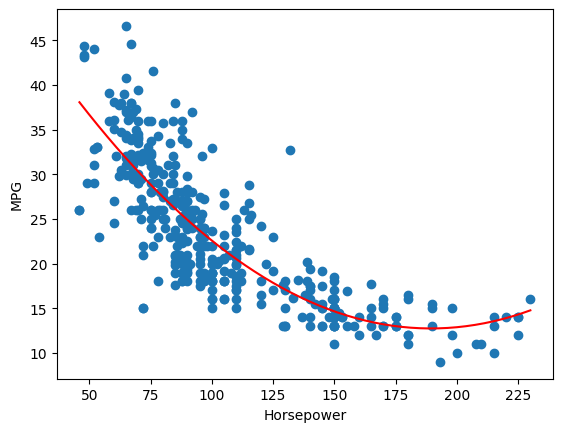

In [131]:
# non-linear relationships
auto = pd.read_csv(isl_data.Auto, na_values='?').dropna()

X = np.vstack([np.ones(len(auto['horsepower'])), auto['horsepower'], auto['horsepower'] ** 2]).T
Y = auto['mpg']
theta = np.linalg.inv(X.T @ X) @ X.T @ Y
print('Coefficients:', [f"{num:.4f}" for num in theta])
# Calculate  t-statistics and p-values
residuals = Y - X @ theta
df = len(Y) - X.shape[1]
mse = np.sum(residuals ** 2) / df
var_cov_matrix = mse * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diag(var_cov_matrix))
t_stats = theta / se
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df)) for t in t_stats]
print('std err:', [f"{num:.4f}" for num in se])
print('t-statistics:', [f"{num:.4f}" for num in t_stats])
# scatter plot
fig, ax = plt.subplots()
ax.scatter(auto['horsepower'], auto['mpg'])
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
# plot the regression curve
# array from min to max
x = np.linspace(auto['horsepower'].min(), auto['horsepower'].max())
y = theta[0] + theta[1] * x + theta[2] * x ** 2
ax.plot(x, y, color='red')

# Potential problems

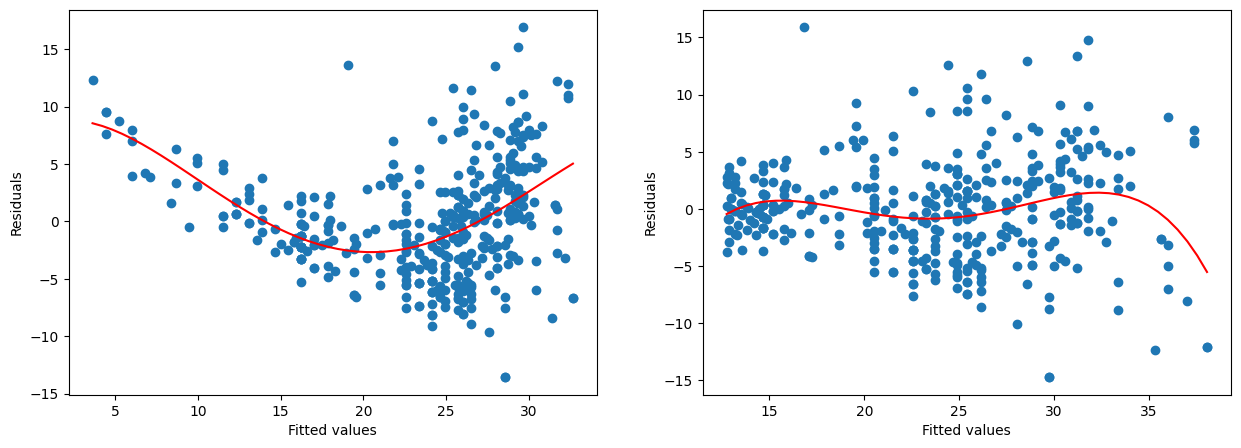

In [163]:
# non-linearity
fig, ax = plt.subplots(1,2, figsize=(15, 5))

# linear regression of HP vs MPG
X = np.vstack([np.ones(len(auto['horsepower'])), auto['horsepower']]).T
Y = auto['mpg']
theta = np.linalg.inv(X.T @ X) @ X.T @ Y
# Residuals
residuals = Y - X @ theta
y_hat = theta @ X.T
ax[0].scatter(y_hat, residuals)

# regression on residuals
# The plot is not the same as in the book as it uses a polynomial regression rather than a smooth fit
X = np.vstack([np.ones(len(y_hat)), y_hat, y_hat**2, y_hat**3, y_hat**4]).T
Y = residuals
theta = np.linalg.inv(X.T @ X) @ X.T @ Y
x = np.linspace(y_hat.min(), y_hat.max())
y = theta[0] + theta[1] * x + theta[2] * (x ** 2)+ theta[3] * (x ** 3)+ theta[4] * (x ** 4)
ax[0].plot(x, y, color='red')
ax[0].set_xlabel('Fitted values')
ax[0].set_ylabel('Residuals')


# Polynomial regression of HP vs MPG
X = np.vstack([np.ones(len(auto['horsepower'])), auto['horsepower'], auto['horsepower'] ** 2]).T
Y = auto['mpg']
theta = np.linalg.inv(X.T @ X) @ X.T @ Y
# Residuals
residuals = Y - X @ theta
y_hat = theta @ X.T
ax[1].scatter(y_hat, residuals)

# regression on residuals
# The plot is not the same as in the book as it uses a polynomial regression rather than a smooth fit
X = np.vstack([np.ones(len(y_hat)), y_hat, y_hat**2, y_hat**3, y_hat**4]).T
Y = residuals
theta = np.linalg.inv(X.T @ X) @ X.T @ Y
x = np.linspace(y_hat.min(), y_hat.max())
y = theta[0] + theta[1] * x + theta[2] * (x ** 2)+ theta[3] * (x ** 3)+ theta[4] * (x ** 4)
ax[1].plot(x, y, color='red')
ax[1].set_xlabel('Fitted values')
ax[1].set_ylabel('Residuals')
fig;